In [18]:

%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.special import softmax, expit

In [19]:
foxes_results = "foxes_results/windio_toy/centreline_windio_toy_foxes_B1.nc"

foxes_data = xr.load_dataset(foxes_results)
print(foxes_data)

<xarray.Dataset>
Dimensions:  (point: 8000, state: 100)
Coordinates:
  * state    (state) float64 0.0 1.0 2.0 3.0 4.0 ... 95.0 96.0 97.0 98.0 99.0
Dimensions without coordinates: point
Data variables:
    x        (point) float64 -1e+03 -999.0 -998.0 ... 6.998e+03 6.999e+03 7e+03
    y        (point) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    z        (point) float64 119.0 119.0 119.0 119.0 ... 119.0 119.0 119.0 119.0
    WD       (state, point) float64 271.8 271.8 271.8 ... 267.3 267.3 267.3
    WS       (state, point) float64 10.09 10.09 10.09 ... 10.03 10.03 10.03
    TI       (state, point) float64 0.02619 0.02619 0.02619 ... 0.03128 0.03128


In [20]:
pywake_results = "../../oneTurbineNoBlockage/FarmFlow.nc"
pywake_data = xr.load_dataset(pywake_results)
print(pywake_data)

<xarray.Dataset>
Dimensions:  (x: 100, y: 100, h: 1, time: 1000)
Coordinates:
  * x        (x) float64 -90.0 -50.36 -10.73 ... 3.755e+03 3.794e+03 3.834e+03
  * y        (y) float64 -90.0 -88.18 -86.36 -84.55 ... 84.55 86.36 88.18 90.0
  * h        (h) float64 119.0
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
    wd       (time) float64 271.8 266.2 268.7 273.6 ... 268.1 276.0 266.8 267.1
    ws       (time) float64 10.09 10.23 8.798 9.662 ... 10.13 9.704 9.613 10.36
Data variables:
    WS_eff   (y, x, h, time) float64 10.09 10.23 8.798 ... 9.685 9.288 9.987
    TI_eff   (y, x, h, time) float64 2.619 1.537 1.651 3.15 ... 4.89 3.749 4.122
    WD       (y, x, h, time) float64 271.8 266.2 268.7 ... 276.0 266.8 267.1
    WS       (y, x, h, time) float64 10.09 10.23 8.798 ... 9.704 9.613 10.36
    TI       (y, x, h, time) float64 2.619 1.537 1.651 3.15 ... 4.89 3.749 4.122
    P        (y, x, h, time) float64 0.001 0.001 0.001 ... 0.001 0.001 0.001


In [21]:
x = foxes_data["x"].to_numpy()
ws = foxes_data["WS"].to_numpy()#[:5]
wd = foxes_data["WD"].to_numpy()#[:5]
ws_mean = np.mean(ws, axis=0)
ws_std = np.std(ws, axis=0)

x_pw = pywake_data["x"].to_numpy()
y_pw = pywake_data["y"].to_numpy()
ws_pw = pywake_data["WS_eff"].to_numpy()[:, :, 0]#[:, :, 0, :5]
yi0_pw = np.argmin(np.abs(y_pw))
print("py y0:", yi0_pw, y_pw[yi0_pw])

py y0: 49 -0.9090909090909065


In [22]:
print(np.interp(250, x, ws_mean))

1.9905441619228748


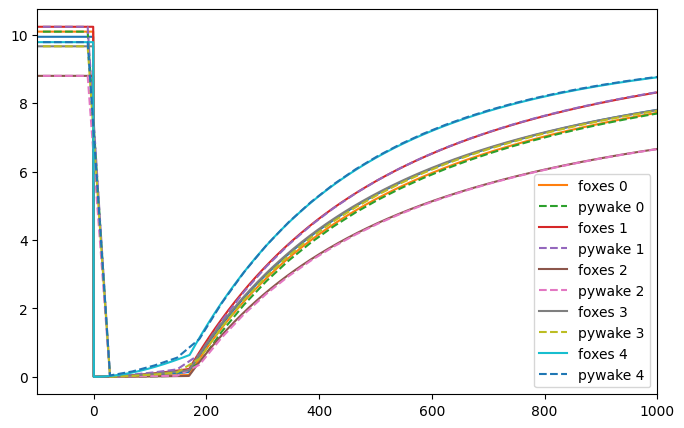

In [23]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x,ws_mean)
for i in range(5):
    ax.plot(x, ws[i], label=f"foxes {i}")
    ax.plot(x_pw, ws_pw[yi0_pw, :, i], linestyle="--", label=f"pywake {i}")
ax.set_xlim(-100,1000)
ax.legend()

#ws_std = np.std(ws, axis=0)
#axs[1].plot(x,ws_std)
#axs[1].set_xlim(-100,1000)

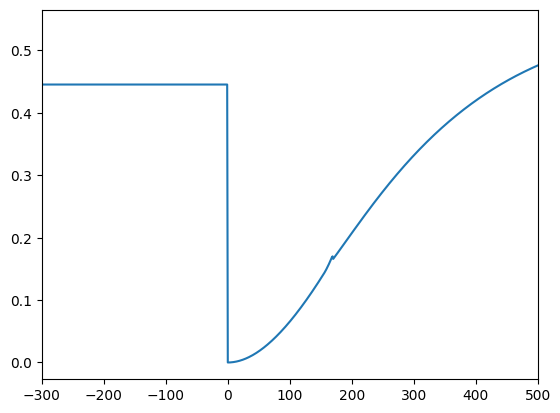

In [24]:
plt.plot(x, ws_std)
plt.xlim(-300,500)
#plt.ylim(0,3)
plt.show()

In [25]:
def sqrt_reg(x, x0):
    y = np.exp(x/x0 - (1 - np.log(x0)))
    return np.where(x<x0, np.sqrt(y), np.sqrt(x))

/tmp/ipykernel_2470/2612466770.py:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(xx, np.sqrt(xx-a))


(-1.0, 3.0)

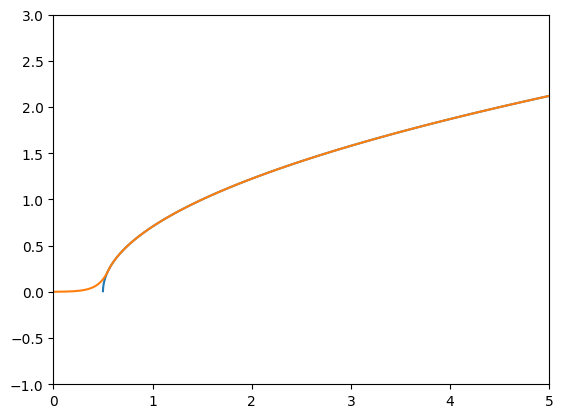

In [26]:
a = 0.5
xx = np.linspace(0,5,10000)
plt.plot(xx, np.sqrt(xx-a))
plt.plot(xx,sqrt_reg(xx-a, 0.05))
plt.xlim(0,5)
plt.ylim(-1,3)

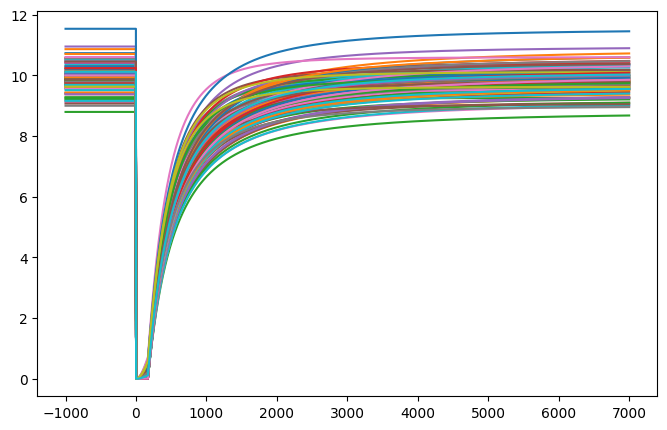

In [27]:
fig,ax = plt.subplots(figsize=(8,5))
for si in range(100):
    ax.plot(x, foxes_data["WS"][si, :])
plt.show()